# Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score
import statsmodels.formula.api as smf

# <span style="color:Red"> Simple Linear Regression on Delivery Data</span>

In [2]:
delivery_time=pd.read_csv("delivery_time.csv")
delivery_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
delivery_time.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


#### Both variables has good correlation

In [5]:
x=delivery_time["Sorting Time"].values.reshape(21,1)
y=delivery_time["Delivery Time"].values.reshape(21,1)

### Visualing

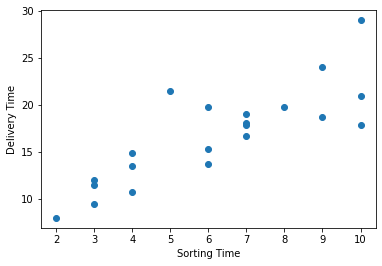

In [6]:
plt.scatter(x,y)
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

E:\Anaconda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

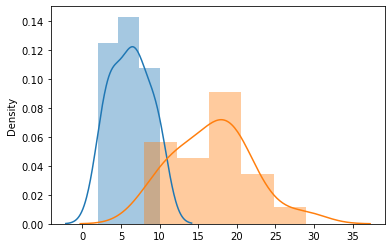

In [7]:
sns.distplot(x,kde=True)
sns.distplot(y,kde=True)

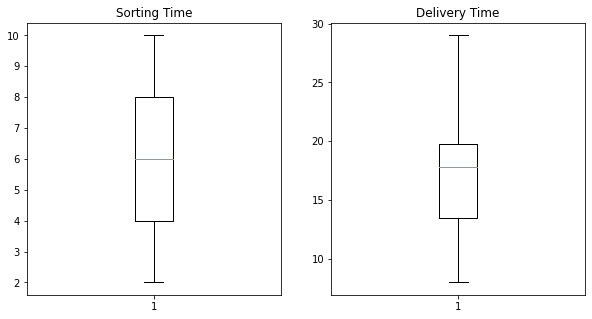

In [8]:
plt.subplots(figsize=(10,5))
plt.subplot(121)
plt.boxplot(x)
plt.title("Sorting Time")
plt.subplot(122)
plt.boxplot(y)
plt.title("Delivery Time")
plt.show()

### Modeling

In [9]:
simple_linear_time=LinearRegression()

In [10]:
simple_linear_time.fit(x,y)

LinearRegression()

In [11]:
print("Model looks like:  Y= {} + X * {}".format(simple_linear_time.intercept_,simple_linear_time.coef_[0]))

Model looks like:  Y= [6.58273397] + X * [1.6490199]


### Prediction

In [12]:
prediction=simple_linear_time.predict(x)
prediction

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

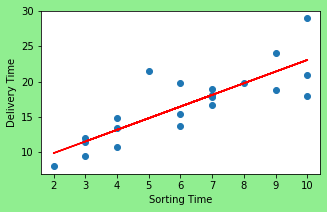

In [13]:
plt.figure(figsize=(5,3),facecolor="lightgreen")
plt.scatter(x,y)
plt.plot(x,prediction,color="Red")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

### Model Validation

In [14]:
r2_score(y,prediction)

0.6822714748417231

### Model is Underfitted, So lets try with some imputations

In [15]:
delivery_time.rename(columns={"Delivery Time":"Delivery_time","Sorting Time":"Sorting_time"},inplace=True)
delivery_time.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Without Imputatons

In [16]:
MD_1=smf.ols("Delivery_time ~ Sorting_time",data=delivery_time).fit()
MD_1.rsquared

0.6822714748417231

### Applying log on independent feature

In [17]:
MD_2=smf.ols("Delivery_time ~ np.log(Sorting_time)",data=delivery_time).fit()
MD_2.rsquared

0.6954434611324223

### Applying log on all features

In [18]:
MD_3=smf.ols("np.log(Delivery_time) ~ np.log(Sorting_time)",data=delivery_time).fit()
MD_3.rsquared

0.77216134926874

### Applying Square roots on all features

In [19]:
MD_4=smf.ols("np.sqrt(Delivery_time) ~ np.sqrt(Sorting_time)",data=delivery_time).fit()
MD_4.rsquared

0.7292011987544664

In [20]:
df=pd.DataFrame({"Models":["Unimputed","Log on Independent Features","Log on both Features","Squareroot on both Features"],
                "R-Square":[MD_1.rsquared,MD_2.rsquared,MD_3.rsquared,MD_4.rsquared]})
df

,Models,R-Square
0,Unimputed,0.682271
1,Log on Independent Features,0.695443
2,Log on both Features,0.772161
3,Squareroot on both Features,0.729201


## Hence, model with log on both dependent and independent features would be best

# <span style="color:Red">Simple Linear Regression on Salary Data</span>

In [21]:
Salary=pd.read_csv("Salary_Data.csv")
Salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [22]:
Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### Visualization

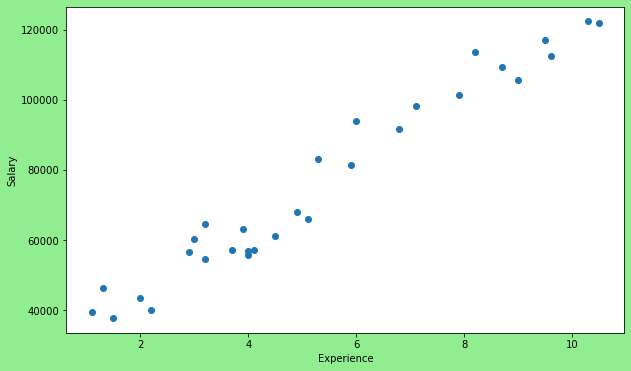

In [23]:
plt.figure(figsize=(10,6),facecolor="lightgreen")
plt.scatter(Salary["YearsExperience"],Salary["Salary"])
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

In [24]:
Salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### Highly Correlated data

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

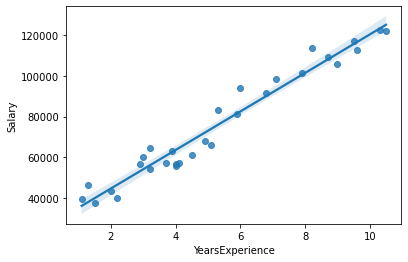

In [25]:
sns.regplot(x="YearsExperience",y="Salary",data=Salary)

## Modeling 

In [26]:
Salary_M1=smf.ols("Salary ~ YearsExperience",data=Salary).fit()
Salary_M1


In [27]:
Salary_M1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [28]:
Salary_M1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        15:23:30   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### - Lets try applying <span style="color:red">log</span> in independent variable

In [29]:
Salary_M2=smf.ols("Salary ~ np.log(YearsExperience)",data=Salary).fit()
Salary_M2

In [30]:
Salary_M2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [31]:
Salary_M2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           3.25e-13
Time:                        15:23:31   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### - Lets try applying <span style="color:red">log</span> on dependent variable

In [32]:
Salary_M3=smf.ols("np.log(Salary) ~ YearsExperience", data=Salary).fit()
Salary_M3

In [33]:
Salary_M3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           7.03e-18
Time:                        15:23:31   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### - Lets try adding <span style="color:red">Squared</span> on dependent variable

In [34]:
Salary["ExpSquared"]=Salary["YearsExperience"]**2
Salary_M4=smf.ols("Salary ~ YearsExperience+ExpSquared",data=Salary).fit()
Salary_M4

In [35]:
Salary_M4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           3.59e-19
Time:                        15:23:32   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
YearsExperience  9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
ExpSquared         16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Validation

In [36]:
Models=pd.DataFrame({"Models":["M1","M2","M3","M4"],
                     "R2_Scores":[Salary_M1.rsquared,Salary_M2.rsquared,Salary_M3.rsquared,Salary_M4.rsquared]})
Models

,Models,R2_Scores
0,M1,0.956957
1,M2,0.853889
2,M3,0.931967
3,M4,0.956975


## Hence First Model with no imputations has best r squared vales, if would be best